In [8]:
from eegProcess import *

In [10]:
SECOND = 125
WINDOW_SIZE = 10*SECOND
ep = EEGProcess('0-data/org/', SECOND, WINDOW_SIZE)

Total 24 files :  ['0-data/org/case18.mat', '0-data/org/case24.mat', '0-data/org/case19.mat', '0-data/org/case21.mat', '0-data/org/case20.mat', '0-data/org/case22.mat', '0-data/org/case23.mat', '0-data/org/case8.mat', '0-data/org/case9.mat', '0-data/org/case2.mat', '0-data/org/case3.mat', '0-data/org/case1.mat', '0-data/org/case4.mat', '0-data/org/case5.mat', '0-data/org/case7.mat', '0-data/org/case6.mat', '0-data/org/case12.mat', '0-data/org/case13.mat', '0-data/org/case11.mat', '0-data/org/case10.mat', '0-data/org/case14.mat', '0-data/org/case15.mat', '0-data/org/case17.mat', '0-data/org/case16.mat']


In [133]:
eeg, bis, idx = ep.get_data(ep.file_list[0])

/Users/nibey/Desktop/WorkSpace/kBRI/depthOfAnaesthesia_eeg/eegProcess.py:45: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filepath)


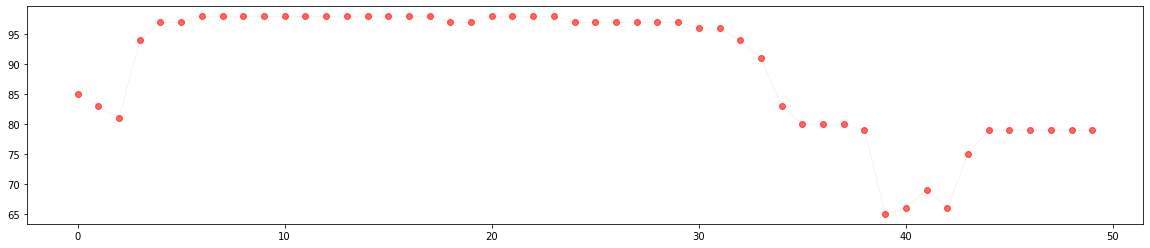

In [138]:
plt.figure(figsize=(20,4))
plt.plot(bis[:50], marker='o', linewidth=0.1, color='r', alpha=0.6)

In [126]:
bis[bis<40]=0
bis[(bis<65) & (bis>=40)]=1
bis[bis>=65]=2

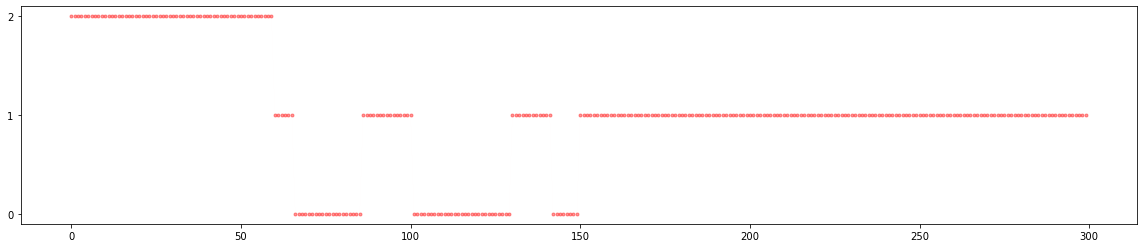

In [132]:
plt.figure(figsize=(20,4))
plt.plot(bis[:300], marker='.', linewidth=0.01, color='red',alpha=0.4)
plt.yticks([0,1,2])
plt.show()

In [30]:
r, need_len = ep.get_data_lenth(eeg, bis)

In [32]:
eeg_cut = ep.cut_eeg(eeg, bis, need_len)

In [34]:
eeg_sp, bis_sp = ep.split_eeg(eeg_cut, bis, r)

In [36]:
eeg_sp.shape, bis_sp.shape

((759, 1250), (759,))

In [37]:
eeg_filterd = ep.filter_eegs(eeg_sp)
eeg_filterd.shape

(759, 1250)

Text(0.5, 0, 'time')

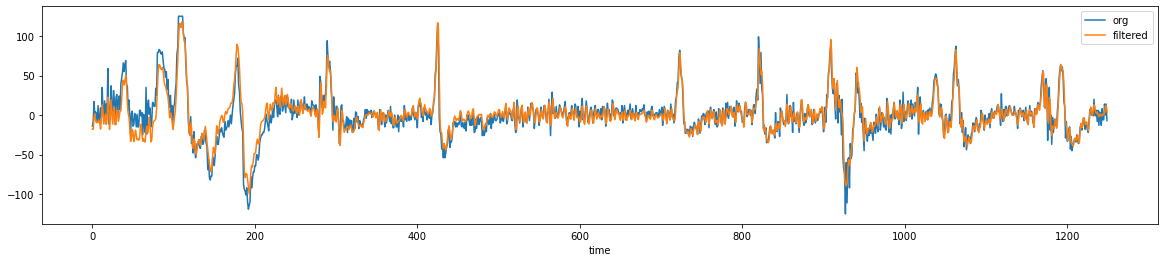

In [59]:
plt.figure(figsize=(20,4))
plt.plot(eeg_sp[0])
plt.plot(eeg_filterd[0])
plt.legend(['org', 'filtered'])
plt.xlabel('time')

In [60]:
imfs = ep.get_imf(eeg_filterd)

0
200
400
600


In [62]:
imfs.shape

(759, 3, 1250)

In [70]:
imf0, imf1, imf2 = imfs[:,0,:], imfs[:,1,:], imfs[:,2,:]
imf0.shape

(759, 1250)

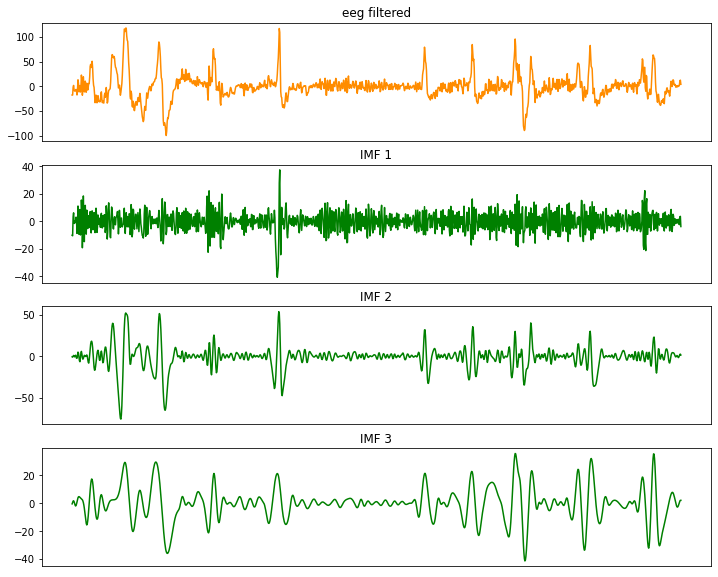

In [90]:
plt.figure(figsize=(12,10))
plt.subplot(4,1,1)
plt.xticks([])
plt.title('eeg filtered')
plt.plot(eeg_filterd[0], color='darkorange')

plt.subplot(4,1,2)
plt.xticks([])
plt.title('IMF 1')
plt.plot(imf0[0], color='green')

plt.subplot(4,1,3)
plt.xticks([])
plt.title('IMF 2')
plt.plot(imf1[0], color='green')

plt.subplot(4,1,4)
plt.xticks([])
plt.title('IMF 3')
plt.plot(imf2[0], color='green')
plt.show()